In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import warnings
import time
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats

In [3]:
seed = 101

In [4]:
featureNames = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our", 
"word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
"word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
"word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
"word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
"word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
"word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
"word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
"word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
"word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
"char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
"capital_run_length_longest", "capital_run_length_total", "class"]
dt = pd.read_csv('dataset/spambase.csv', header=None, names=featureNames)

In [5]:
dt.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Text(0.5, 1.0, 'Class Freq\n0 : ham\n1 : spam')

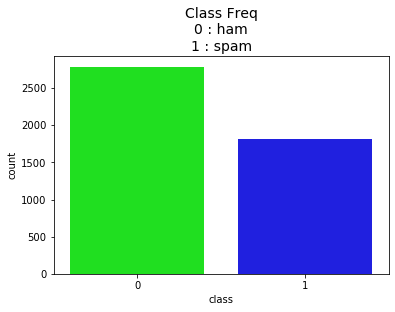

In [6]:
colors = ["#00FF00","#0000FF"]
sns.countplot('class',data = dt, palette =  colors)
plt.title('Class Freq\n0 : ham\n1 : spam',fontsize=14)

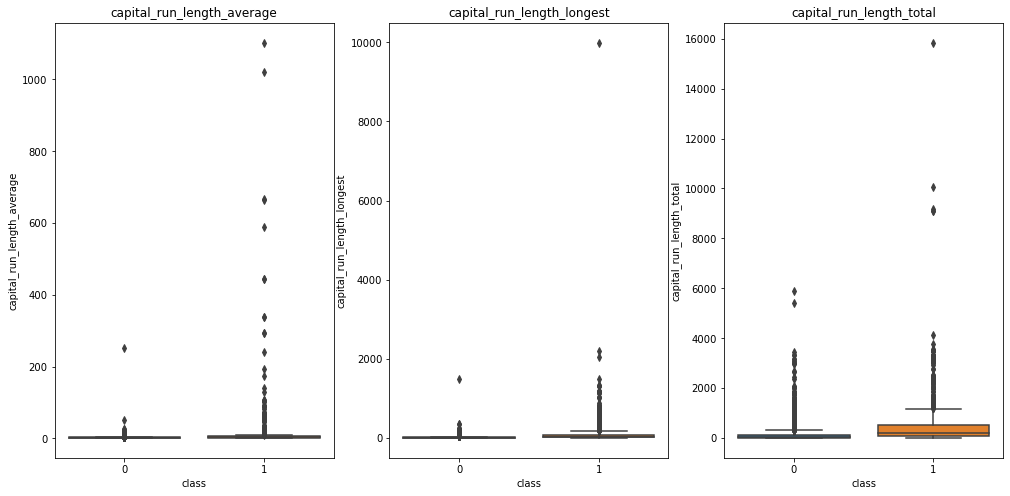

In [7]:
f, axes = plt.subplots(1, 3, figsize=(17,8))
sns.boxplot(x="class",y="capital_run_length_average",data = dt, ax=axes[0]).set_title('capital_run_length_average')
sns.boxplot(x="class",y="capital_run_length_longest",data = dt, ax=axes[1]).set_title('capital_run_length_longest')
sns.boxplot(x="class",y="capital_run_length_total",data = dt, ax=axes[2]).set_title('capital_run_length_total')
plt.show()

In [8]:
def removeOutlier(df, col_name, threshold, upper=True):    
    if(upper==True):
        df = df.drop(df[(df[col_name] >= threshold)].index)
    else:
        df = df.drop(df[(df[col_name] < threshold)].index)
    return df

dt = removeOutlier(dt, 'capital_run_length_average',200)
dt = removeOutlier(dt, 'capital_run_length_longest', 1400)
dt = removeOutlier(dt, 'capital_run_length_total', 4000)

## After Removing Outlier

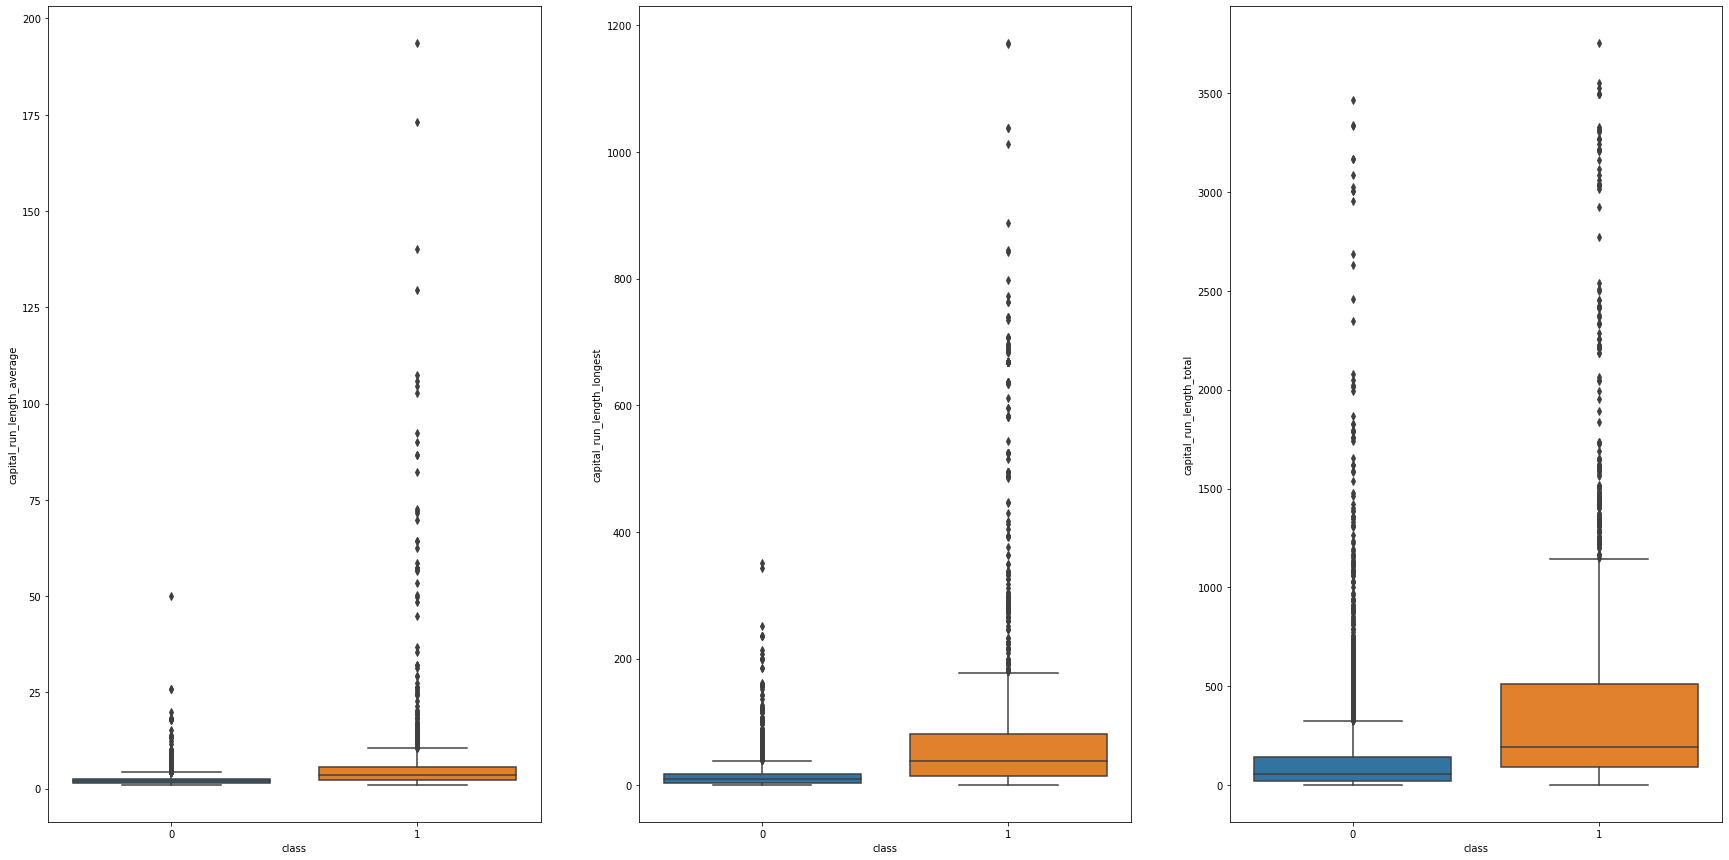

In [9]:
f, axes = plt.subplots(1, 3, figsize=(30,15))
sns.boxplot(x='class', y='capital_run_length_average',data=dt,ax = axes[0])
sns.boxplot(x='class', y='capital_run_length_longest',data=dt,ax = axes[1])
sns.boxplot(x='class', y='capital_run_length_total',data=dt,ax = axes[2])

In [10]:
mscaler = MinMaxScaler((0,100))

dt['capital_run_length_average'] = mscaler.fit_transform(np.array(dt['capital_run_length_average']).reshape(-1,1))
dt['capital_run_length_longest'] = mscaler.fit_transform(np.array(dt['capital_run_length_longest']).reshape(-1,1))
dt['capital_run_length_total'] = mscaler.fit_transform(np.array(dt['capital_run_length_total']).reshape(-1,1))

## Visualization after Normalization

In [11]:
dt.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,...,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000,4580.000000
mean,0.104044,0.213707,0.277900,0.065675,0.311205,0.096162,0.114585,0.105603,0.089035,0.238330,...,0.038251,0.137354,0.017011,0.267778,0.075112,0.043963,1.417412,3.827007,7.043775,0.391921
std,0.305758,1.293433,0.500914,1.398339,0.673004,0.274375,0.392245,0.401910,0.278193,0.645218,...,0.243061,0.230609,0.109627,0.816689,0.244524,0.429346,4.060266,8.832909,12.595832,0.488233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302857,0.427350,0.906425,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,0.656364,1.196581,2.479339,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.311250,0.050000,0.000000,1.401039,3.589744,6.958144,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,100.000000,100.000000,100.000000,1.000000


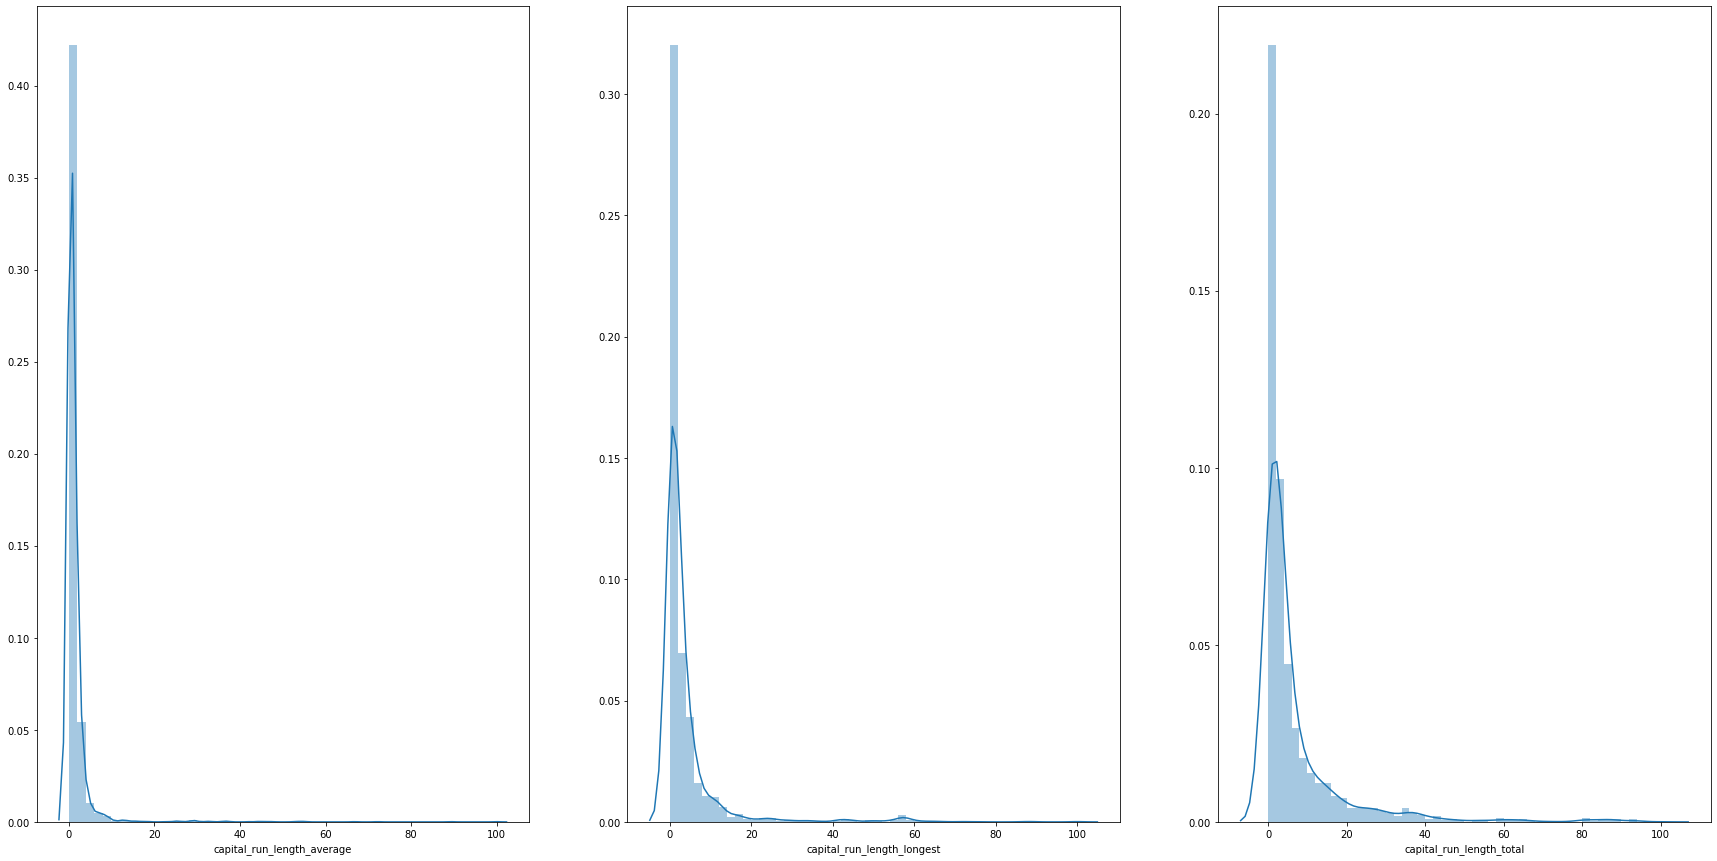

In [12]:
f, axes = plt.subplots(1,3,figsize=(30,15))
sns.distplot(dt['capital_run_length_average'],ax=axes[0])
sns.distplot(dt['capital_run_length_longest'],ax=axes[1])
sns.distplot(dt['capital_run_length_total'],ax=axes[2])

In [13]:
dt['capital_run_length_average'] = np.log(np.array(dt['capital_run_length_average']+1).reshape(-1,1))
dt['capital_run_length_longest'] = np.log(np.array(dt['capital_run_length_longest']+1).reshape(-1,1))
dt['capital_run_length_total'] = np.log(np.array(dt['capital_run_length_total']+1).reshape(-1,1))

dt['capital_run_length_average'] = np.log(np.array(dt['capital_run_length_average']+1).reshape(-1,1))
dt['capital_run_length_longest'] = np.log(np.array(dt['capital_run_length_longest']+1).reshape(-1,1))
dt['capital_run_length_total'] = np.log(np.array(dt['capital_run_length_total']+1).reshape(-1,1))

## Transformation

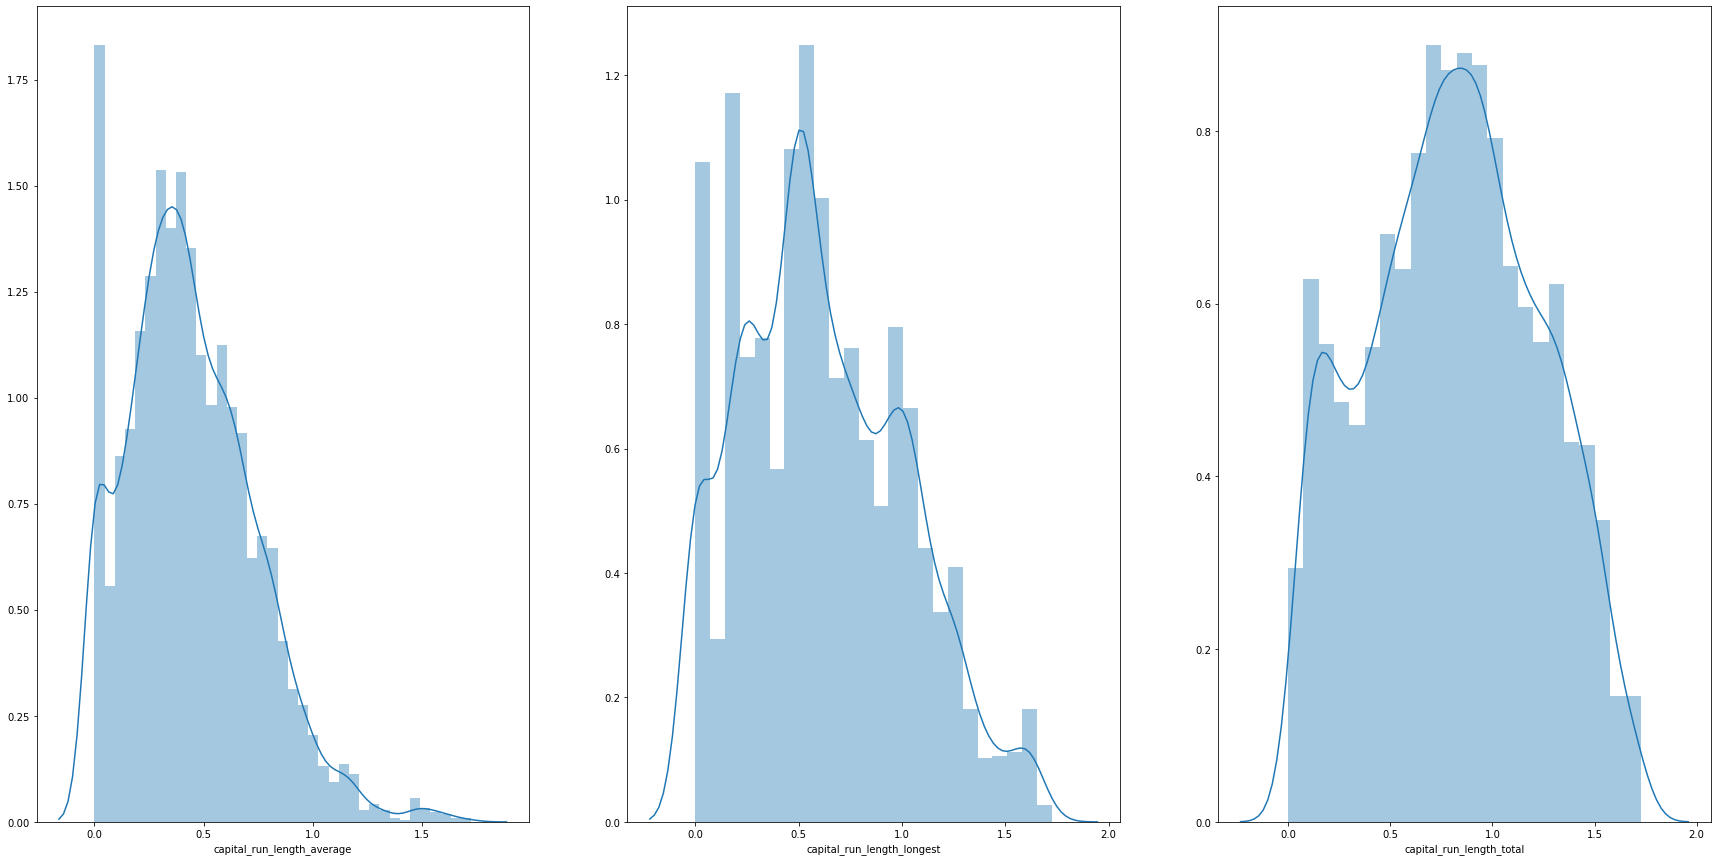

In [14]:
f, axes = plt.subplots(1,3,figsize=(30,15))
sns.distplot(dt['capital_run_length_average'],ax=axes[0])
sns.distplot(dt['capital_run_length_longest'],ax=axes[1])
sns.distplot(dt['capital_run_length_total'],ax=axes[2])

In [15]:
dt = dt.reset_index()
X = dt
X = X.drop(columns='index')
y = X.pop('class')

## PCA Representation

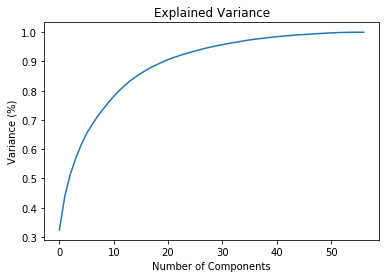

In [16]:
pca = PCA().fit(X)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

### SVM preparation

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(5)
svm_par = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
clf = GridSearchCV(SVC(random_state=seed), svm_par).fit(X, y).best_estimator_

In [18]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def GetMetrics(estimator, X, y):
    y_pred = estimator.predict(X)
    acc = accuracy_score(y, y_pred)
    pre, rec, fs, sup = precision_recall_fscore_support(y, y_pred)
    return acc, pre, rec, fs

### Training and Testing

In [19]:
pca = PCA(10)

scores = 0

for train_index, test_index in skf.split(X, y) :
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #pca.fit(X_train)
    #X_train = pca.transform(X_train)
    #X_test = pca.transform(X_test)
    
    classifier = clf.fit(X_train, y_train)
    scores = GetMetrics(classifier, X_test, y_test)

### print the scores

In [20]:
names = ['Accuracy','Precision','Recall','f-score']

for i in range(len(scores)) : 
    print(names[i],scores[i],sep=' = ',)

Accuracy = 0.8427947598253275
Precision = [0.90097087 0.7680798 ]
Recall = [0.83303411 0.85793872]
f-score = [0.86567164 0.81052632]
